In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from tqdm import tqdm
# Use matplotlib in notebook output
%matplotlib inline

In [6]:
data = pd.read_csv("face.csv")
Y = data['FID']
X = data.drop(['FID'],axis=1)
# print('X shape: ',X.shape)
# print('Y shape: ',Y.shape)

In [25]:
kmeans = KMeans(n_clusters=79,random_state=0).fit(X)
centers = kmeans.cluster_centers_
print("Tâm cụm: ")
print(centers)

Tâm cụm: 
[[ 0.0741492  -0.08582757  0.07118003 ... -0.15121402 -0.01657355
  -0.033245  ]
 [ 0.11040907 -0.04774802 -0.19697173 ... -0.21460053 -0.06084599
  -0.09080188]
 [ 0.04474464 -0.03428811 -0.16308328 ... -0.14920733  0.02242929
  -0.05255605]
 ...
 [ 0.02961999 -0.00634913 -0.15275127 ... -0.05279512  0.02860604
   0.07867805]
 [ 0.00967367 -0.10062796 -0.01054584 ... -0.02211465  0.11498381
  -0.04522375]
 [ 0.10529635 -0.12892391  0.08153251 ... -0.06321385 -0.00767143
  -0.05323208]]


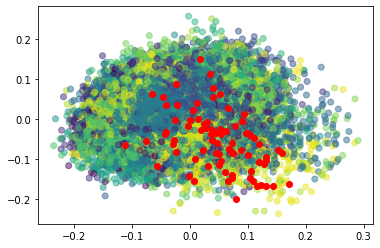

In [26]:
plt.scatter(data['EMB_6'], data['EMB_7'], c=kmeans.labels_.astype(float),alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.show()

In [27]:
mau_moi=np.array([[0.32714815,-0.22074495,-0.043450274,-0.13720256,-0.07745706,-0.10667298,0.004801472,-0.026113743,-0.104959816,0.07916366,0.037622776,-0.025126016,0.013541422,-0.07517471,0.07620214,-0.00032201802,0.07851215,-0.07611115,0.07065341,0.06726032,-0.105666585,0.02971501,-0.176883,0.09826957,0.04701207,0.01790167,0.046678875,-0.032449372,0.0869289,-0.09421948,0.06706382,0.02383662,-0.0015956922,-0.18975537,0.009891883,0.011035533,-0.30791361,0.10467171,0.13095011,0.07539504,0.082864076,0.049527958,0.12580529,-0.06761194,-0.06632462,-0.16151021,0.0058762566,0.09525009,-0.056547698,-0.007982472,-0.048915192,0.08933437,0.057254523,-0.0967138,0.033779994,-0.097341426,0.096009925,0.14670342,0.023388451,-0.034732066,0.048809655,-0.15241314,-0.09554148,0.2066808,0.1262436,0.12066179,0.14310437,0.027598206,0.028077202,0.005030728,-0.13347289,-0.13956502,0.021395933,-0.10557232,-0.002604257,-0.044238213,-0.06690789,-0.014660075,-0.09556474,-0.07075569,-0.044118453,0.008914337,-0.0107516805,-0.030390555,0.082991116,-0.14888825,-0.06608179,-0.057988454,-0.17154412,0.08281842,0.11609265,-0.037194397,-0.010196879,-0.011433893,0.016719729,-0.083021045,-0.0180706,0.08509958,-0.096570455,-0.022777043,-0.04252939,0.008879919,0.1400144,0.054218855,-0.04977526,0.015690932,0.0976066,0.055143848,-0.029953556,-0.07694861,0.02645639,0.1507644,0.16923787,-0.034205783,-0.018500559,-0.11458846,-0.011977786,0.14909431,0.17248285,0.07561229,0.072965965,0.0239089,-0.020423647,0.0090930825,0.10653353,-0.16300812,-0.06417947,0.02185152]])
kq=kmeans.predict(mau_moi)
print('Mẫu mới thuộc cụm số: ',kq)

Mẫu mới thuộc cụm số:  [66]


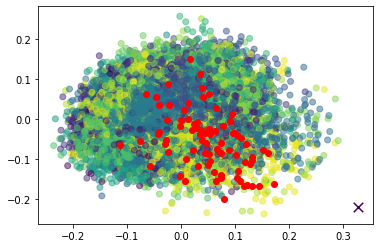

In [28]:
plt.scatter(data['EMB_6'], data['EMB_7'], c = kmeans.labels_.astype(float),alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')
plt.scatter(mau_moi[0,0], mau_moi[0,1], c = kq[0], marker="x", s=90)
plt.show()

In [29]:
print("Độ lệch phân cụm:")
print(kmeans.inertia_)


Độ lệch phân cụm:
6129.279156341552


In [22]:
list_do_lech=[]
list_C = []
for C in tqdm(range(70,90+1)):
    kmeans = KMeans(n_clusters=C, random_state=0).fit(X)
    list_do_lech.append(kmeans.inertia_)
    list_C.append(C)



100%|██████████| 21/21 [09:27<00:00, 27.05s/it]


[6351.473954746411, 6310.503253012983, 6291.12476290206, 6285.854799886492, 6233.042593849898, 6184.8009843874715, 6160.969669003591, 6159.364732985499, 6140.987743766098, 6129.279156341552, 6105.1019198971935, 6082.752053592421, 6038.52341254299, 6028.595670910419, 6004.294356293143, 5980.531824542535, 5955.298638925563, 5944.396487903856, 5916.631634450907, 5880.907258949632, 5886.253876389652]
Độ lệch nhỏ nhất khi C bằng:  89


In [23]:
index_min = np.argmin(list_do_lech)
print(list_do_lech)
print("Độ lệch nhỏ nhất khi C bằng: ",list_C[index_min])


[6351.473954746411, 6310.503253012983, 6291.12476290206, 6285.854799886492, 6233.042593849898, 6184.8009843874715, 6160.969669003591, 6159.364732985499, 6140.987743766098, 6129.279156341552, 6105.1019198971935, 6082.752053592421, 6038.52341254299, 6028.595670910419, 6004.294356293143, 5980.531824542535, 5955.298638925563, 5944.396487903856, 5916.631634450907, 5880.907258949632, 5886.253876389652]
Độ lệch nhỏ nhất khi C bằng:  89
